## 6 Dimensional Variational Autoencoder trained with STELIB library (SVO)
Based on data from the STELIB service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries
http://svocats.cab.inta-csic.es/stelib/index.php
Data set: http://svocats.cab.inta-csic.es/stelib/index.php?action=search

Adrián García Riber and Francsico Serradilla.
Polytechnic University of Madrid

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np
from numpy import save

import os
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
root = '/Users/adrian/Documents/FITS_Library/stelib'



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    1 / number of data axes                            NAXIS1  =                 6700 / length of data axis 1                          EXTEND  =                    T / FITS dataset may contain extensions            DATE    = '25/05/99'           / FITS file creation date (dd/mm/yy)             OBJECT  = 'HD268623           '/ star identification                            ORIGIN  = 'Laboratoire D'astrophysique, OMP, Toulouse, France' /                TELESCOP= '2.3m, Siding Spring Observatory, Australia ' /                       INSTRUME= 'DBS '               /Instrument                                      BUNIT   = 'erg /s /cm2 /angstroms ' /Physical units of data array               OBSERVER= 'A. Lancon ' / Name of Observers                                      RA      =  

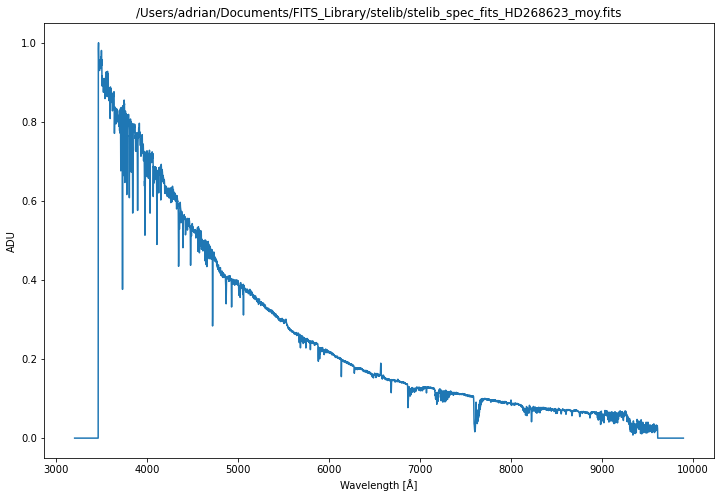

In [3]:
# Path and name of one file to check the library
file = root+"/stelib_spec_fits_HD268623_moy.fits"

# Print the header
sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

# Extracting and normalizing the fluxes
flux2 = np.array(sp[0].data)
flux_norm = np.reshape(flux2/(np.nanmax(flux2)), (sp[0].header['NAXIS1']))

# Extracting the wavelengths
wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']

# Closing the fits-file
sp.close()
# Plot the spectrum
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_norm)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

In [4]:
# Counting the spectra and printing the spectrum dimension
num = 1
for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
dim1 = sp[0].header['NAXIS1']
print(num)
print(dim1)

257
6700


In [5]:
# Creating the custom_set with all the spectra and generating labels to enable recovering header information
curves = 0
custom_set = np.zeros((num, dim1))
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num 

for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = np.reshape(data/(np.nanmax(data)), (sp[0].header['NAXIS1']))

            
            label_set[curves] = curves 
            spectra_set[curves] = name
            for i in range (dim1):
                custom_set[curves,i] = (data_norm[i])
        hdulist.close   
        curves += 1
               
        print ("Spectra loaded:",curves+1, "spectra");


Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD195725_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 2 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD148513_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 3 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD141004_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 4 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD139641_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 5 spectra
Filename: /Users/adrian/Documents/FITS_L

  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 36 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD37394_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 37 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD111028_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 38 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD135722_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 39 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD87737_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      3

Spectra loaded: 70 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD029574_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 71 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD32537_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 72 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD141714_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 73 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD138290_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 74 spectra
Filename: 

Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD182101_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 105 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD39801_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 106 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD037680_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 107 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD85235_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 108 spectra
Filename: /Users/adrian/Documents/

Spectra loaded: 139 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD165195_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 140 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD197345_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 141 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD78418_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 142 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD181470_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 143 spectra
Filen

Spectra loaded: 173 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD112300_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 174 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD108177_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 175 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD269697_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 176 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD101606_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 177 spectra
File

Spectra loaded: 207 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD144206_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 208 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD154733_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 209 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD87822_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 210 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD47839_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 211 spectra
Filena

Spectra loaded: 241 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD130948_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 242 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD107213_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 243 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD164349_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 244 spectra
Filename: /Users/adrian/Documents/FITS_Library/stelib/stelib_spec_fits_HD88609_moy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (6700,)   float32   
Spectra loaded: 245 spectra
Filen

In [6]:
custom_set.shape

(257, 6700)

In [7]:
label_set = np.asarray(label_set)

In [8]:
label_set.shape

(257,)

In [9]:
# Augmenting the dataset through the repetition of the spectra
augmentation = 15
custom_set = np.repeat(custom_set, augmentation, axis=0)
label_set = np.repeat(label_set, augmentation, axis=0)

In [10]:
custom_set.shape

(3855, 6700)

In [11]:
label_set.shape

(3855,)

In [12]:
# Generating the data set
dataset = tf.data.Dataset.from_tensor_slices((custom_set, label_set))
dataset.element_spec

2023-04-28 17:03:35.529013: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(TensorSpec(shape=(6700,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [13]:
# Splitting the data set
x_train,x_test,y_train,y_test=train_test_split(custom_set,label_set,test_size=0.2,random_state=123)

In [14]:
# Defining the VAE sampling function
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim), mean=0., stddev=0.00000001)#0.001_e-3
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [15]:
# Defining the layers' dimensions
original_dim = dim1
latent_dim = 6
intermediate_dim = dim1/3
intermediate_dim2 = intermediate_dim/2
intermediate_dim3 = intermediate_dim2/2
intermediate_dim4 = intermediate_dim3/latent_dim

In [16]:
original_dim

6700

In [17]:
# Defining the Encoder
original_inputs = tf.keras.Input(shape=(original_dim,), name="encoder_input")
x1 = layers.Dense(intermediate_dim, activation="relu")(original_inputs)
x2 = layers.Dense(intermediate_dim2, activation="relu")(x1)
x3 = layers.Dense(intermediate_dim3, activation="relu")(x2)
x4 = layers.Dense(intermediate_dim4, activation="relu")(x3)



z_mean = layers.Dense(latent_dim, name="z_mean")(x4)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x4)
z = Sampling()((z_mean, z_log_var))
encoder = tf.keras.Model(inputs=original_inputs, outputs=z, name="encoder")

In [18]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 6700)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 2233)         14963333    ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 1116)         2493144     ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 558)          623286      ['dense_1[0][0]']                
                                                                                            

In [19]:
# Defining the Decoder
latent_inputs = tf.keras.Input(shape=(latent_dim,), name="z_sampling")
x5 = layers.Dense(intermediate_dim4, activation="relu")(latent_inputs)
x6 = layers.Dense(intermediate_dim3, activation="relu")(x5)
x7 = layers.Dense(intermediate_dim2, activation="relu")(x6)
x8 = layers.Dense(intermediate_dim, activation="relu")(x7)


outputs = layers.Dense(original_dim, activation="sigmoid")(x8)
decoder = tf.keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")

In [20]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 6)]               0         
                                                                 
 dense_4 (Dense)             (None, 93)                651       
                                                                 
 dense_5 (Dense)             (None, 558)               52452     
                                                                 
 dense_6 (Dense)             (None, 1116)              623844    
                                                                 
 dense_7 (Dense)             (None, 2233)              2494261   
                                                                 
 dense_8 (Dense)             (None, 6700)              14967800  
                                                                 
Total params: 18,139,008
Trainable params: 18,139,008
Non-t

In [21]:
# Creating the model
outputs = decoder(z)
vae6D = tf.keras.Model(inputs=original_inputs, outputs=outputs, name="VAE6D")

In [22]:
vae6D.summary()

Model: "VAE6D"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 6700)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 2233)         14963333    ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 1116)         2493144     ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 558)          623286      ['dense_1[0][0]']                
                                                                                              

In [23]:
# Adding KL divergence regularization loss.
kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae6D.add_loss(kl_loss)

In [24]:
vae6D.summary()

Model: "VAE6D"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 6700)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 2233)         14963333    ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 1116)         2493144     ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 558)          623286      ['dense_1[0][0]']                
                                                                                              

In [25]:
# Training
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
vae6D.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
vae6D.fit(x_train, x_train, epochs=100, batch_size=2)

Epoch 1/100
1542/1542 [==============================] - 102s 66ms/step - loss: 0.0849
Epoch 2/100
1542/1542 [==============================] - 101s 66ms/step - loss: 0.0477
Epoch 3/100
1542/1542 [==============================] - 105s 68ms/step - loss: 0.0305
Epoch 4/100
1542/1542 [==============================] - 103s 67ms/step - loss: 0.0273
Epoch 5/100
1542/1542 [==============================] - 105s 68ms/step - loss: 0.0240
Epoch 6/100
1542/1542 [==============================] - 103s 67ms/step - loss: 0.0187
Epoch 7/100
1542/1542 [==============================] - 107s 69ms/step - loss: 0.0163
Epoch 8/100
1542/1542 [==============================] - 106s 69ms/step - loss: 0.0142
Epoch 9/100
1542/1542 [==============================] - 103s 67ms/step - loss: 0.0126
Epoch 10/100
1542/1542 [==============================] - 104s 67ms/step - loss: 0.0114
Epoch 11/100
1542/1542 [==============================] - 102s 66ms/step - loss: 0.0100
Epoch 12/100
1542/1542 [=================

In [26]:
# Testing
encoded_test = encoder(x_test)

In [27]:
decoded_test = vae6D(x_test)

In [28]:
decoded_imgs_test=decoded_test.numpy()
decoded_imgs_test

array([[4.1787520e-02, 4.2654715e-02, 3.8484089e-02, ..., 5.6824509e-05,
        4.4580207e-05, 3.8964277e-05],
       [1.9160317e-01, 1.9126564e-01, 1.8753457e-01, ..., 1.5716791e-05,
        1.1964870e-05, 1.1006368e-05],
       [3.3023375e-07, 4.9905623e-07, 3.4672257e-07, ..., 2.2884636e-23,
        1.3673695e-23, 6.1623948e-24],
       ...,
       [1.4329436e-01, 1.4124468e-01, 1.3811493e-01, ..., 7.1622467e-06,
        5.4391026e-06, 5.0451376e-06],
       [3.8779917e-01, 3.8988405e-01, 3.8333100e-01, ..., 1.0673226e-05,
        7.5173721e-06, 8.6489754e-06],
       [3.9296773e-01, 3.9276460e-01, 3.8570684e-01, ..., 3.2203077e-06,
        2.2089475e-06, 2.8096044e-06]], dtype=float32)

## Ploting some results

Text(0.5, 0, 'Decoded Spectra')

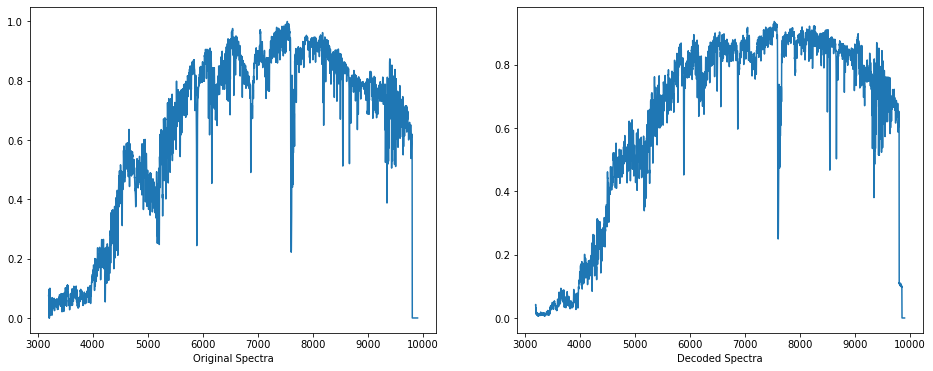

In [29]:
figure = 0
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(wave2, x_test[figure])
ax[0].set_xlabel('Original Spectra')   
ax[1].plot(wave2, decoded_imgs_test[figure])
ax[1].set_xlabel('Decoded Spectra')

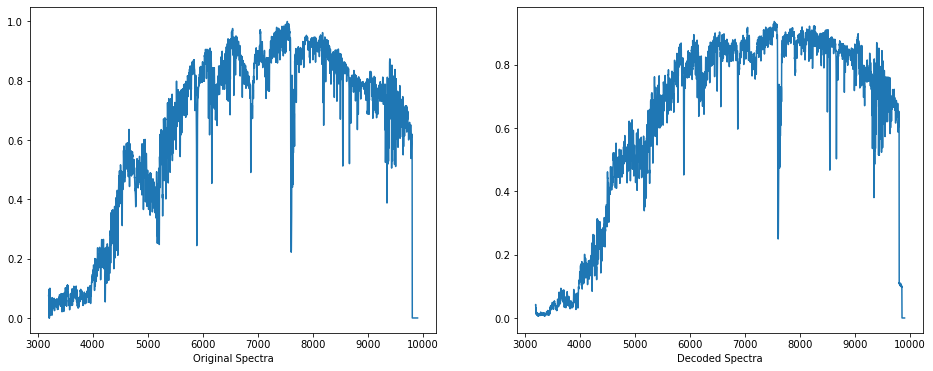

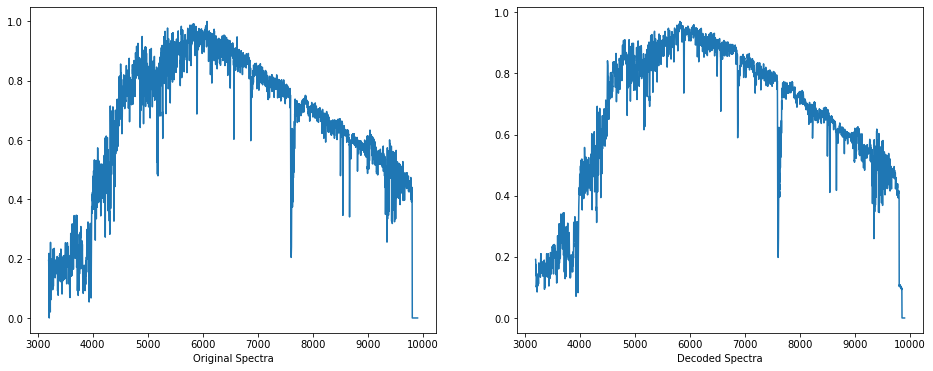

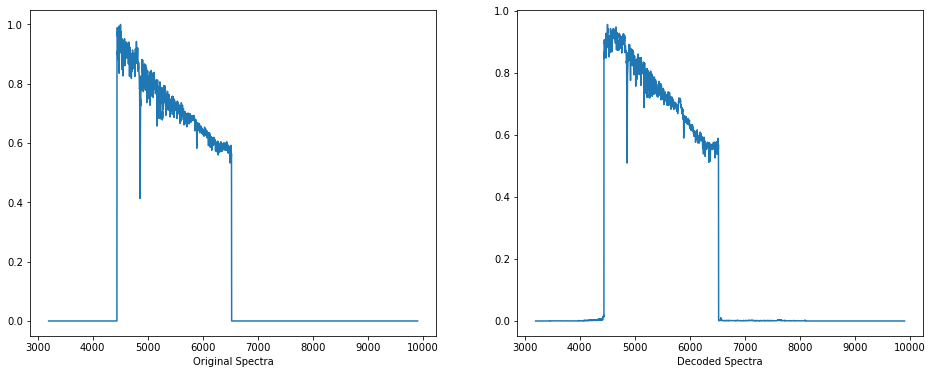

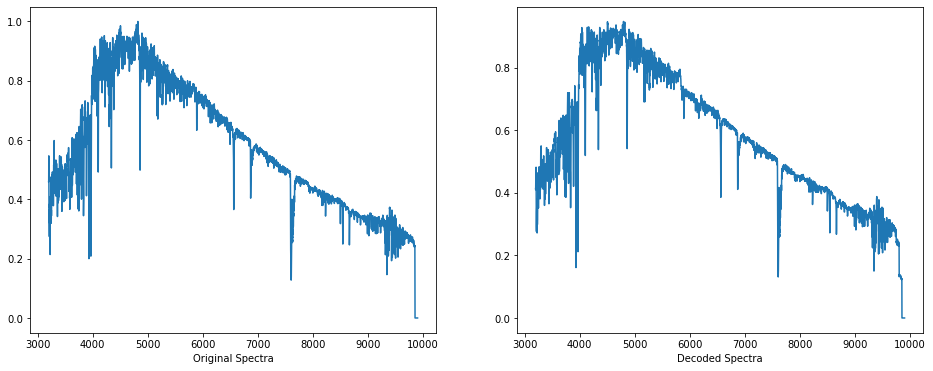

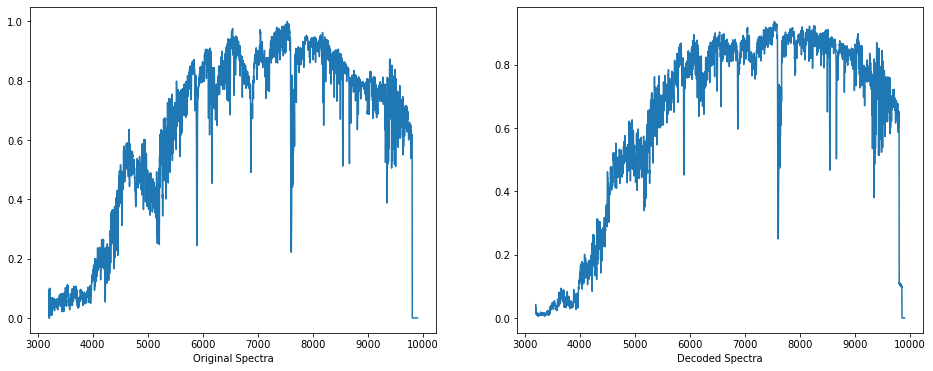

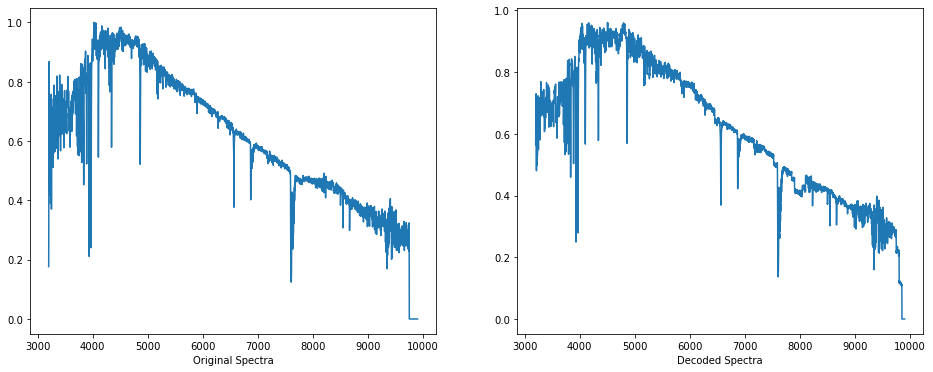

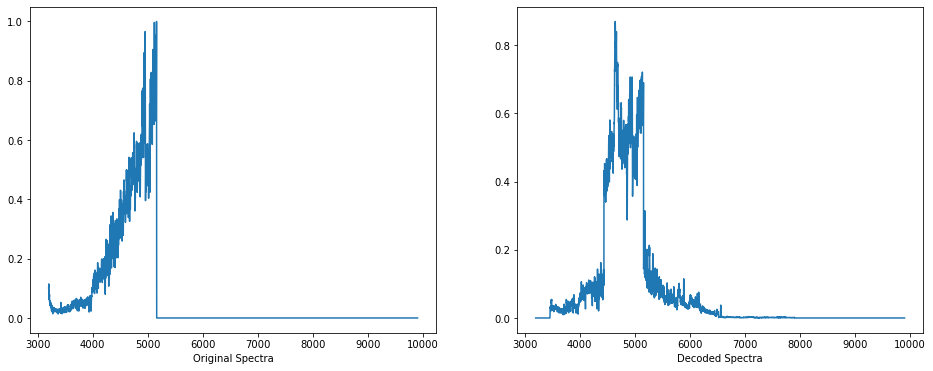

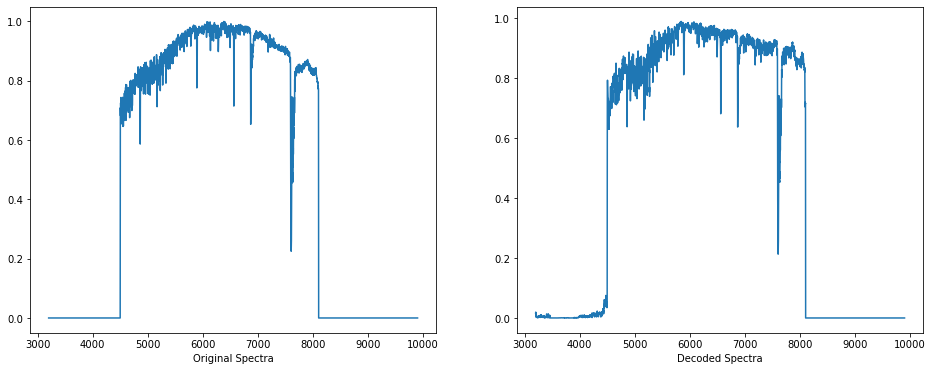

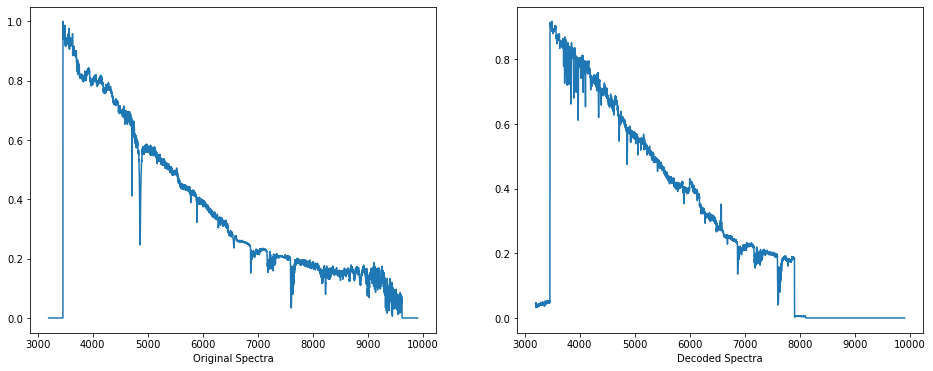

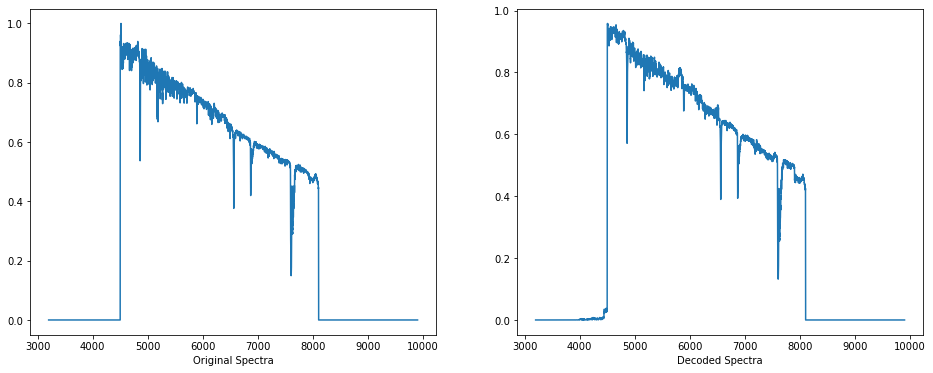

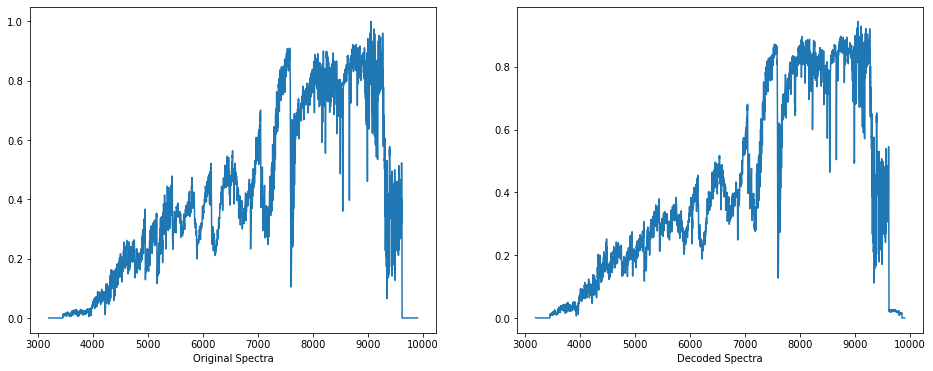

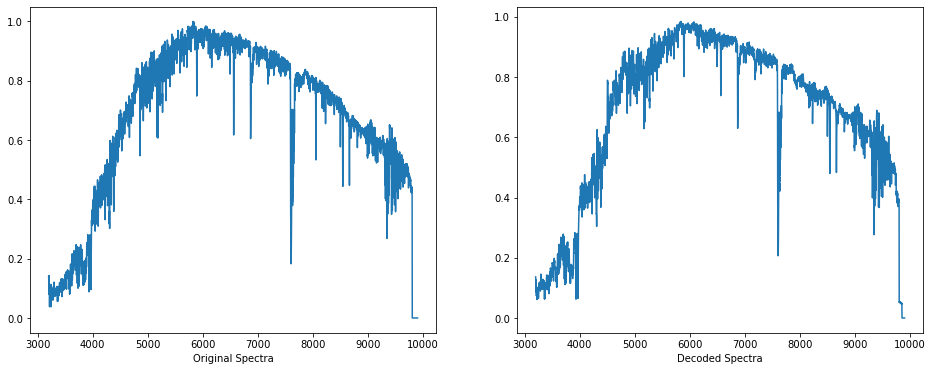

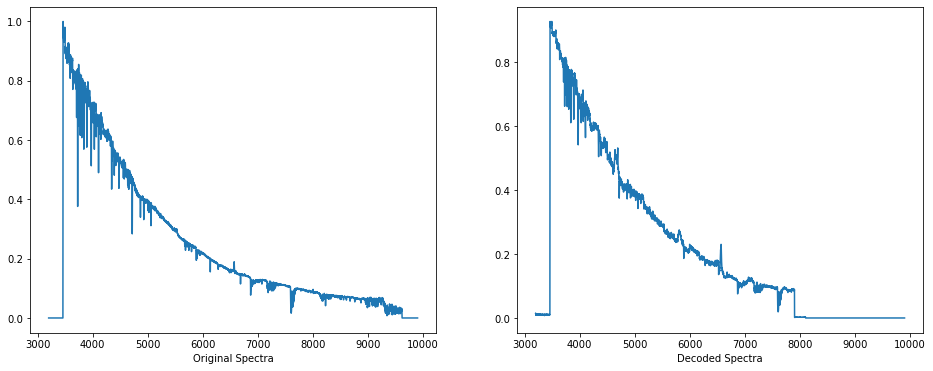

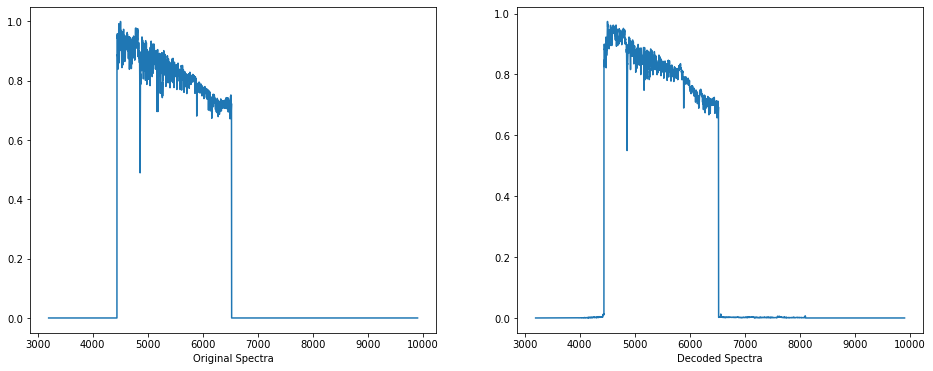

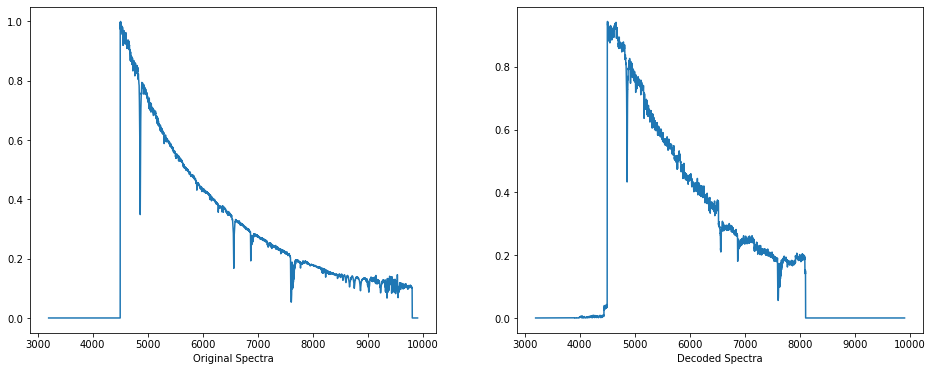

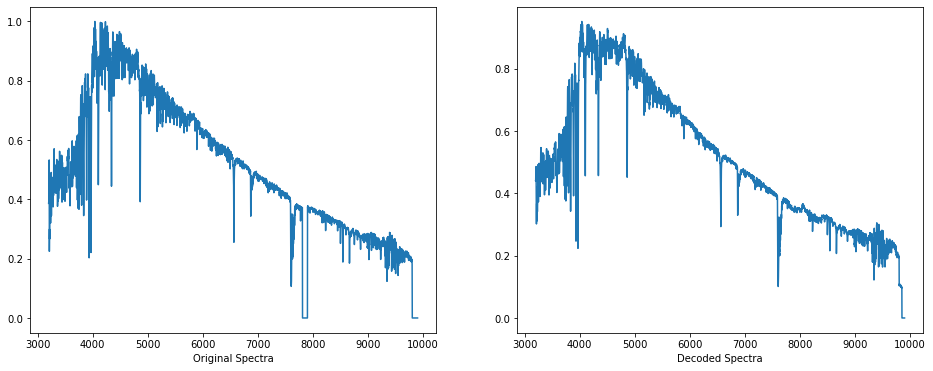

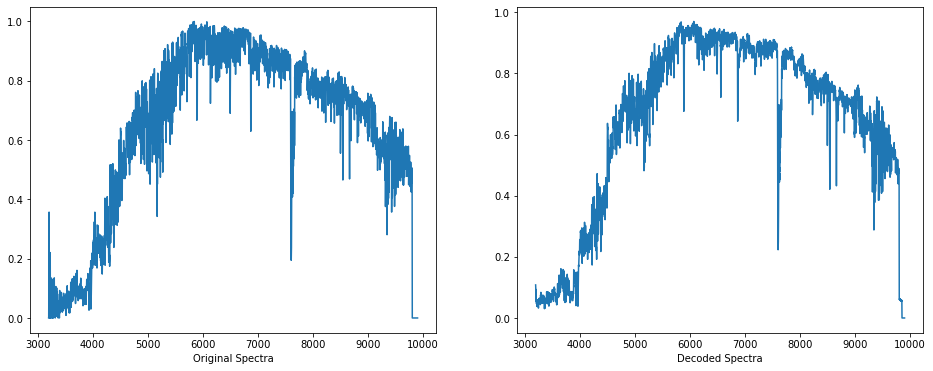

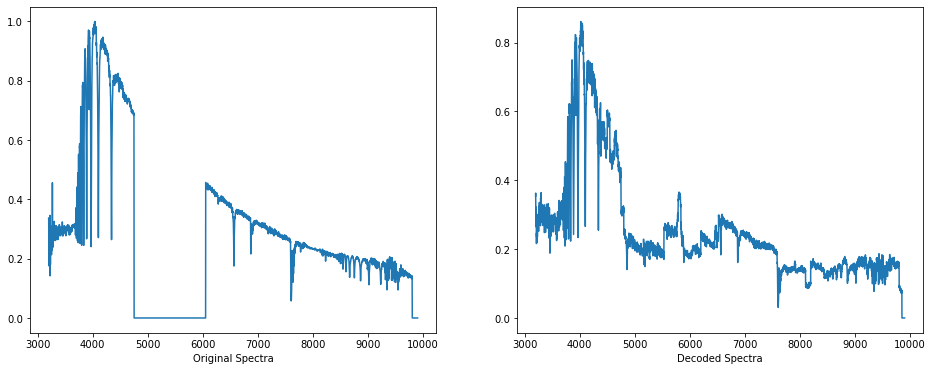

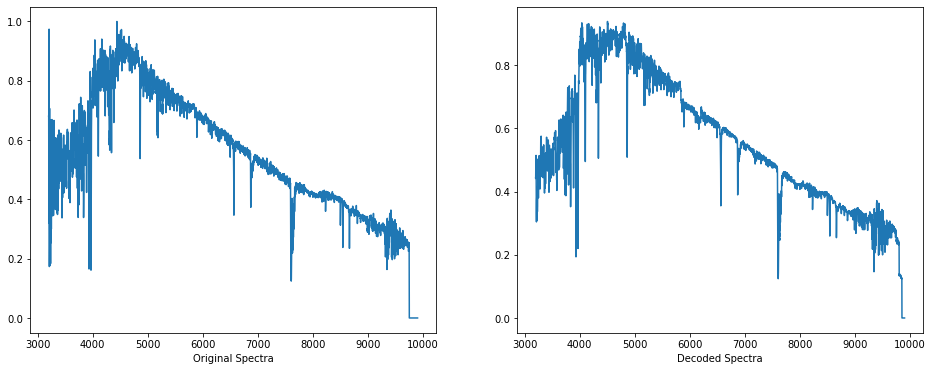

In [30]:
for m in range(20):
    figure = m
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(wave2, x_test[figure])
    ax[0].set_xlabel('Original Spectra')   
    ax[1].plot(wave2, decoded_imgs_test[figure])
    ax[1].set_xlabel('Decoded Spectra')
plt.close(fig)

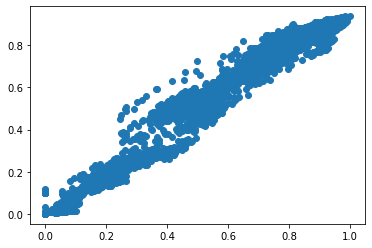

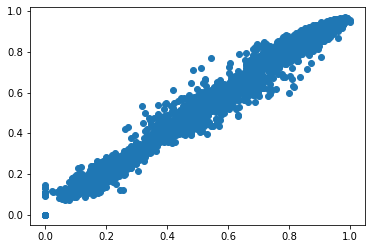

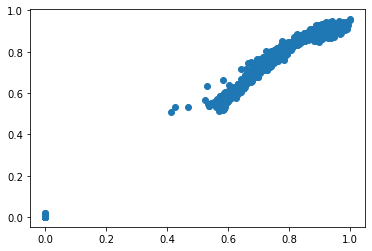

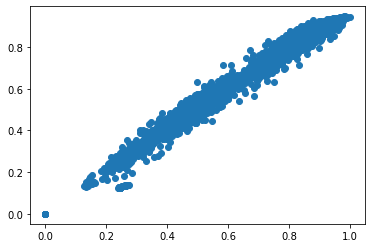

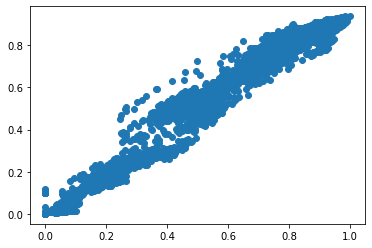

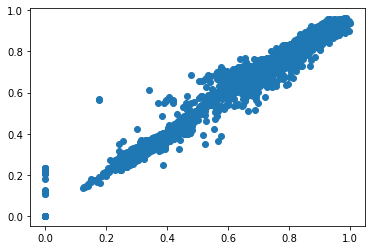

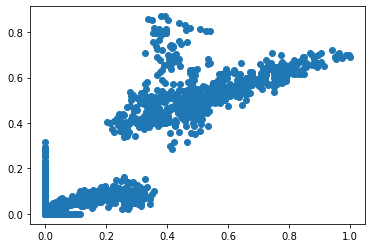

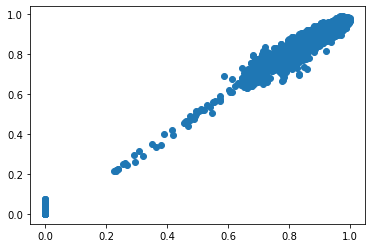

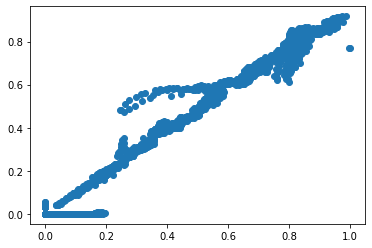

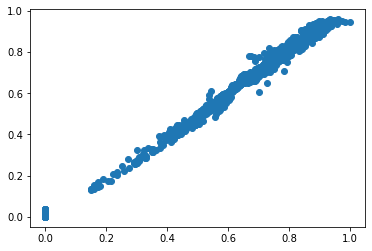

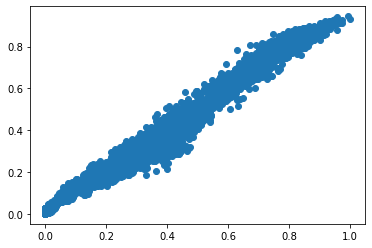

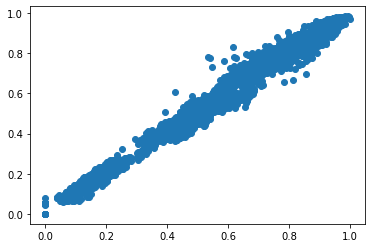

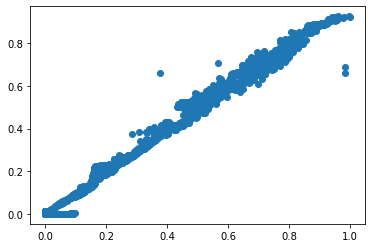

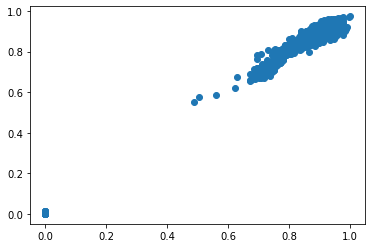

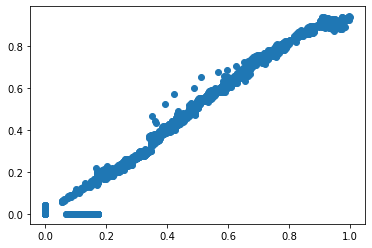

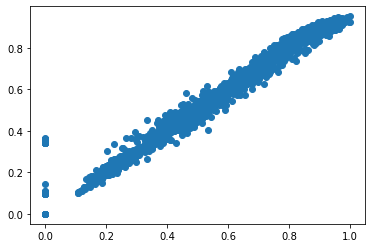

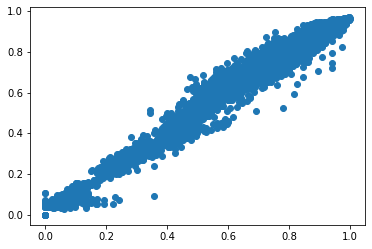

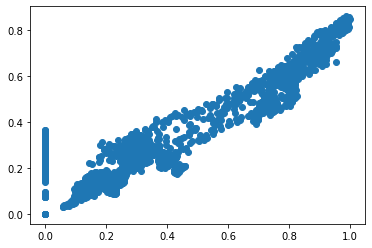

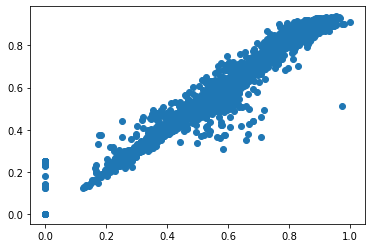

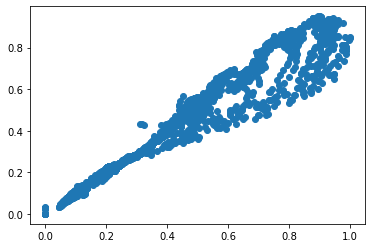

In [31]:
# Plotting the relation between original spectrum and decoded output
for sample in range(20):
    _ = plt.plot(x_test[sample], decoded_imgs_test[sample], 'o')
    plt.show()

In [32]:
# Calculating R_square for the test set
r2_score(x_test, decoded_imgs_test, multioutput='variance_weighted')

0.9772744238438873

In [33]:
# Calculating R_square for each spectrum
r2_score(x_test[0], decoded_imgs_test[0], multioutput='variance_weighted')

0.9751343951122141

## Saving the Model

In [39]:
weights = vae6D.get_weights()
vae6D.save_weights('STELIB_6DVAE-augmented_Weights_OK', weights)

In [40]:
vae6D.save('STELIB_6DVAE-augmented_OK.tf', save_format='tf')

INFO:tensorflow:Assets written to: STELIB_6DVAE-augmented_OK.tf/assets


In [41]:
encoder.save('STELIB_6D_Encoder-augmented_OK.tf', save_format='tf')

INFO:tensorflow:Assets written to: STELIB_6D_Encoder-augmented_OK.tf/assets


In [42]:
decoder.save('STELIB_6D_Decoder-augmented_OK.tf', save_format='tf')

INFO:tensorflow:Assets written to: STELIB_6D_Decoder-augmented_OK.tf/assets
